Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.704978749608
For n_clusters = 3 The average silhouette_score is : 0.588200401213
For n_clusters = 4 The average silhouette_score is : 0.650518663273
For n_clusters = 5 The average silhouette_score is : 0.563764690262
For n_clusters = 6 The average silhouette_score is : 0.450466629437

For n_clusters = 2 calinski_harabaz_sc is : 1604.11228641
For n_clusters = 3 calinski_harabaz_sc is : 1809.99196696
For n_clusters = 4 calinski_harabaz_sc is : 2704.48587351
For n_clusters = 5 calinski_harabaz_sc is : 2263.23620551
For n_clusters = 6 calinski_harabaz_sc is : 2043.32413896


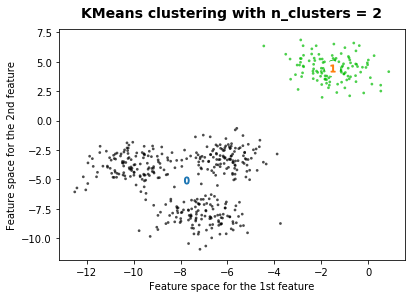

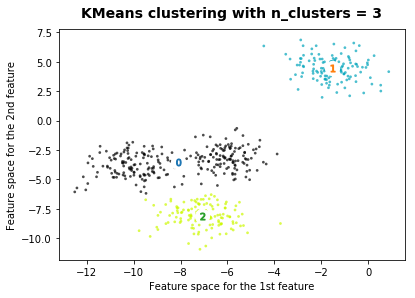

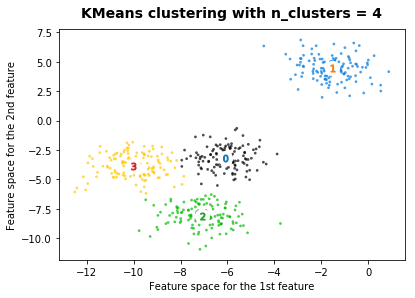

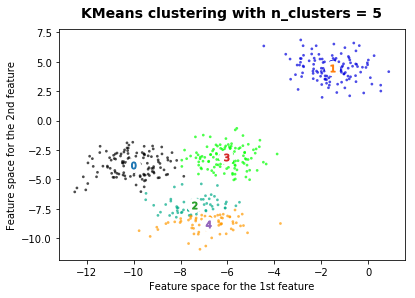

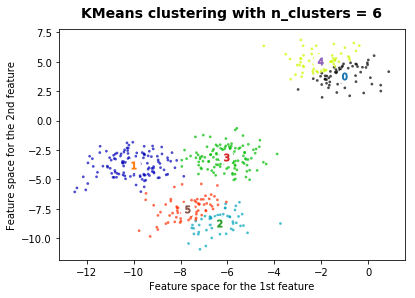

In [19]:
%matplotlib inline
from __future__ import print_function
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn import metrics

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

ch = []
sa = []

for n_clusters in range_n_clusters:
    fig = plt.figure()

    # Add set of axes to figure
    ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.8])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    sa.append(silhouette_avg)
    
    calinski_harabaz_sc = metrics.calinski_harabaz_score(X, cluster_labels)
    ch.append(calinski_harabaz_sc)

    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("KMeans clustering with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    
for i in range(2, 7):
    print("For n_clusters =", i, "The average silhouette_score is :", sa[i-2])
    
print()
for i in range(2, 7):
    print("For n_clusters =", i, "calinski_harabaz_sc is :", ch[i-2])

**It is hard to say what works better in this case: the silhouette_score or calinski_harabaz_score. The silhouette_score recommends 2 clusters and calinski_harabaz_score recommends 4 clusters. The both solutions are good and it is up to us to decide which one to use.**